In [12]:
import pandas as pd
import numpy as np
import os

def convert(lat_str):
    degrees, minutes, seconds = lat_str.split("°")[0], lat_str.split("°")[1].split("′")[0], lat_str.split("′")[1].split("″")[0]

    # 将字符串元素转换为浮点数
    degrees = float(degrees)
    minutes = float(minutes)
    seconds = float(seconds)

    # 将度、分、秒转换为度数表示
    lat = degrees + minutes / 60 + seconds / 3600
    return lat


data = pd.read_csv('E:\\XMU\\230117paper\\220920_paper\\230224\\漳江口互花米草采样点坐标.csv',header=None)
data.columns = ['采样点','纬度','经度','高程']
for i in range(data.shape[0]):
    data['纬度'][i] = data['纬度'][i].split('″')[0]
    data['经度'][i] = data['经度'][i].split('″')[0]

data['纬度'] = data['纬度'].apply(convert)
data['经度'] = data['经度'].apply(convert)

mydata = pd.read_excel('E:\\XMU\\230117paper\\220920_paper\\raw_data_1123.xlsx',index_col=0)
# mydata = pd.read_excel(r'E:\XMU\231002_reproduce\preprocess_data\continual_data.xlsx')

src_points = np.array([[0, 0], [15000, 18000]])
dst_points = np.array([[117.414905, 23.933933], [117.430231, 23.915684]])

def src2dst(x,y):
    x = (x - src_points[0][0]) / (src_points[1][0] - src_points[0][0]) * (dst_points[1][0] - dst_points[0][0]) + dst_points[0][0]
    y = (y - src_points[0][1]) / (src_points[1][1] - src_points[0][1]) * (dst_points[1][1] - dst_points[0][1]) + dst_points[0][1]
    return x,y

def dst2src(x,y):
    x = (x - dst_points[0][0]) / (dst_points[1][0] - dst_points[0][0]) * (src_points[1][0] - src_points[0][0]) + src_points[0][0]
    y = (y - dst_points[0][1]) / (dst_points[1][1] - dst_points[0][1]) * (src_points[1][1] - src_points[0][1]) + src_points[0][1]
    return x,y

dst_xy = []
dst_x = []
dst_y = []
for i in range(mydata.shape[0]):
    src_x = mydata['X'][i]
    src_y = mydata['Y'][i]
    # transform
    dst_xy.append(src2dst(src_x,src_y))
    dst_x.append(src2dst(src_x,src_y)[0])
    dst_y.append(src2dst(src_x,src_y)[1])

mydata['dst_xy'] = dst_xy
mydata['dst_x'] = dst_x
mydata['dst_y'] = dst_y
mydata.to_excel('mydata_0224.xlsx')

C:\Users\40562\AppData\Local\Temp\ipykernel_4676\2929969449.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['纬度'][i] = data['纬度'][i].split('″')[0]
C:\Users\40562\AppData\Local\Temp\ipykernel_4676\2929969449.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['经度'][i] = data['经度'][i].split('″')[0]


In [6]:
mydata['Y'].max()

17113

In [1]:
import pandas as pd
import os

In [3]:
data_path = r'E:\XMU\231002_reproduce\preprocess_data\continual_data.xlsx'
data = pd.read_excel(data_path)

In [10]:
data

,Unnamed: 0,patch num,year,size,pos_x,pos_y,growth_rate,growth days
0,215,161,2015,2195,3625,7588,0.025974,77
1,244,207,2015,910,5195,9124,0.038961,77
2,479,357,2015,3432,13481,5662,0.064935,77
3,370,285,2015,2720,8389,6878,0.116883,77
4,140,113,2015,5657,11949,2743,0.181818,77
...,...,...,...,...,...,...,...,...
1813,1570,1090,2021,8975,4790,7014,15.329577,355
1814,1771,1274,2021,18921,4313,12041,18.636620,355
1815,1053,751,2021,12660,3807,3662,18.749296,355
1816,1815,1330,2021,8705,15346,12280,24.025352,355


In [6]:
data['pos_x'].max(),data['pos_x'].min(),data['pos_y'].max(),data['pos_y'].min()

(17113, 73, 14810, 12)

In [7]:
X, Y = data['pos_y'], 18000  - data['pos_x']

In [14]:
src2dst(X,Y)

(0       117.422658
 1       117.424227
 2       117.420690
 3       117.421932
 4       117.417708
            ...    
 1813    117.422071
 1814    117.427208
 1815    117.418647
 1816    117.427452
 1817    117.428032
 Name: pos_y, Length: 1818, dtype: float64,
 0       23.919359
 1       23.920951
 2       23.929351
 3       23.924189
 4       23.927798
           ...    
 1813    23.920540
 1814    23.920057
 1815    23.919544
 1816    23.931242
 1817    23.931755
 Name: pos_x, Length: 1818, dtype: float64)

In [2]:
src_data_x = []
src_data_y = []
for i in range(data.shape[0]):
    dst_y = data['经度'][i]
    dst_x = data['纬度'][i]
    # transform
    src_data_x.append(dst2src(dst_y, dst_x)[0])
    src_data_y.append(dst2src(dst_y, dst_x)[1])
    
    # src_data.append(dst2src(dst_x,dst_y))

data['src_data_X'] = src_data_x
data['src_data_Y'] = src_data_y
data.to_excel('data_0224.xlsx')

In [14]:
src_points = np.array([[0, 0], [15000, 18000]])
dst_points = np.array([[117.414905, 23.933933], [117.430231, 23.915684]])
dst2src(117.4183778,23.93402368)

(3398.9299230036086, -89.44270918911195)

In [13]:
dst2src(117.4183778,23.93402368)

(4078.71590760433, -74.53559099092664)

In [9]:
mydata

,beta_pac2_min-max标准化,beta_pac3_min-max标准化,beta_pac4_min-max标准化,beta_pac1_min-max标准化,year,size,X,Y,growth_rate,growth,...,class,class_pca,growth_area_1,growth_area_2,growth_area_3,growth_area_4,growth_area_5,dst_xy,dst_x,dst_y
0,0.660552,0.433954,0.625455,0.288114,2014,1419,4884,2067,1.033122,1466,...,2,2,41.909428,117.263929,145.208531,163.511476,177.964722,"(117.41989514560001, 23.931837406499998)",117.419895,23.931837
1,0.750125,0.429469,0.663866,0.282937,2014,1767,4418,2249,0.448783,793,...,2,2,121.831140,135.000585,141.754388,147.333078,151.523293,"(117.41941901786667, 23.931652888833334)",117.419419,23.931653
2,0.825261,0.426968,0.679530,0.277643,2014,940,3978,2409,1.360638,1279,...,2,2,21.256371,34.252961,38.696508,51.014731,59.831276,"(117.4189694552, 23.9314906755)",117.418969,23.931491
3,0.846372,0.426687,0.676919,0.271656,2014,2904,3934,2761,1.117080,3244,...,2,2,54.034444,71.856073,85.510892,98.326316,106.365696,"(117.41892449893334, 23.931133806166667)",117.418924,23.931134
4,0.906527,0.419733,0.680551,0.267369,2014,2682,3466,2955,1.167040,3130,...,2,2,118.486696,150.924858,163.478549,172.648556,181.399847,"(117.41844632773334, 23.930937122499998)",117.418446,23.930937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.978340,0.038477,0.524337,0.986083,2020,330,11926,14683,4.739394,1564,...,1,0,606.387022,617.583968,629.083946,648.866609,683.383655,"(117.42709019173334, 23.919046885166665)",117.427090,23.919047
850,0.784572,0.807206,0.891792,0.747428,2020,122,7282,15113,0.557377,68,...,1,1,522.705241,529.916679,533.665474,551.370873,562.652340,"(117.42234526213333, 23.918610936833332)",117.422345,23.918611
851,0.830991,0.404390,0.857249,0.882930,2020,203,8700,15747,0.945813,192,...,1,2,676.627531,687.806665,696.852629,703.021019,709.863837,"(117.42379408000001, 23.9179681665)",117.423794,23.917968
852,0.827734,0.404965,0.860885,0.888625,2020,159,8746,16089,0.949686,151,...,1,2,849.149321,853.462559,863.982586,870.049561,874.920328,"(117.42384107973334, 23.9176214355)",117.423841,23.917621


In [15]:
x,y = data['src_data_X'].values,data['src_data_Y'].values
mydata = mydata[mydata['year'] == 2020].reset_index()
x_ref, y_ref = mydata['X'].values, mydata['Y'].values
# 最近邻匹配

In [16]:
import numpy as np
from scipy.spatial import distance
distances = distance.cdist(np.column_stack((x, y)), np.column_stack((x_ref, y_ref)), 'euclidean')

# 找到最小距离
min_dist_idx = np.argmin(distances, axis=1)

# 获取最接近的参考点
nearest_x_ref, nearest_y_ref = x_ref[min_dist_idx], y_ref[min_dist_idx]

In [17]:
mydata

,index,beta_pac2_min-max标准化,beta_pac3_min-max标准化,beta_pac4_min-max标准化,beta_pac1_min-max标准化,year,size,X,Y,growth_rate,...,class,class_pca,growth_area_1,growth_area_2,growth_area_3,growth_area_4,growth_area_5,dst_xy,dst_x,dst_y
0,251,0.438145,0.300790,0.563074,0.116767,2020,43791,12242,5082,0.097075,...,2,0,3.562722,4.826639,9.638030,14.002618,18.618573,"(117.42741305946667, 23.928780699)",117.427413,23.928781
1,282,0.443674,0.628711,0.462175,0.081985,2020,23705,11522,5675,0.068003,...,0,1,0.142580,26.011418,39.940335,47.340899,53.233329,"(117.42667741146667, 23.928179495833334)",117.426677,23.928179
2,667,0.924688,0.413075,0.644199,0.252375,2020,6004,3662,3807,1.108594,...,2,2,42.099356,44.507417,45.551149,49.579300,53.017079,"(117.41864658746667, 23.930073336499998)",117.418647,23.930073
3,672,0.746388,0.512856,0.530642,0.227613,2020,320,4966,4682,0.384375,...,2,2,17.767588,18.396548,28.636868,38.706657,45.493319,"(117.41997892773334, 23.929186232333333)",117.419979,23.929186
4,676,0.438511,0.215614,0.600923,0.136132,2020,6195,12904,4942,0.761743,...,2,0,24.549729,28.196678,35.740866,41.230501,45.015411,"(117.42808944693334, 23.928922635666666)",117.428089,23.928923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,849,0.978340,0.038477,0.524337,0.986083,2020,330,11926,14683,4.739394,...,1,0,606.387022,617.583968,629.083946,648.866609,683.383655,"(117.42709019173334, 23.919046885166665)",117.427090,23.919047
77,850,0.784572,0.807206,0.891792,0.747428,2020,122,7282,15113,0.557377,...,1,1,522.705241,529.916679,533.665474,551.370873,562.652340,"(117.42234526213333, 23.918610936833332)",117.422345,23.918611
78,851,0.830991,0.404390,0.857249,0.882930,2020,203,8700,15747,0.945813,...,1,2,676.627531,687.806665,696.852629,703.021019,709.863837,"(117.42379408000001, 23.9179681665)",117.423794,23.917968
79,852,0.827734,0.404965,0.860885,0.888625,2020,159,8746,16089,0.949686,...,1,2,849.149321,853.462559,863.982586,870.049561,874.920328,"(117.42384107973334, 23.9176214355)",117.423841,23.917621


In [18]:
data_concat = mydata.loc[min_dist_idx].reset_index()
new_data = pd.concat([data,data_concat],axis=1)

In [ ]:
data

In [19]:
new_data.to_excel('采样点和遥感分析_2021.xlsx')

In [82]:
min_dist_idx

array([621, 621, 621, 621,  22,  22,  22,  22,  22, 621, 621, 621, 831,
       831, 621, 621, 621,  22,  22,  22,  22,  22,  22,  22, 664, 664,
       664], dtype=int64)

In [107]:
from PIL import Image

# 读取原始图像
img = Image.open('E:\\remote_data\\numvis\\201408ddyw(1).jpg')

# 计算下采样后的图像大小
target_shape = (1500,1800)
scale = min(target_shape[0] / img.size[0], target_shape[1] / img.size[1])
output_shape = tuple(int(dim * scale) for dim in img.size)

# 进行下采样
img2 = img.resize(output_shape, resample=Image.BICUBIC)

# 裁剪到目标大小
# w_start = (img2.size[0] - target_shape[0]) // 2
# h_start = (img2.size[1] - target_shape[1]) // 2
# img2 = img2.crop((w_start, h_start, w_start + target_shape[0], h_start + target_shape[1]))

# 保存下采样后的图像
img2.save('image_downsampled.png')


In [108]:
img2_np = np.array(img2)

In [109]:
img2_np.shape

(1800, 1499, 3)

In [100]:
mydata['Y'].max()

17113

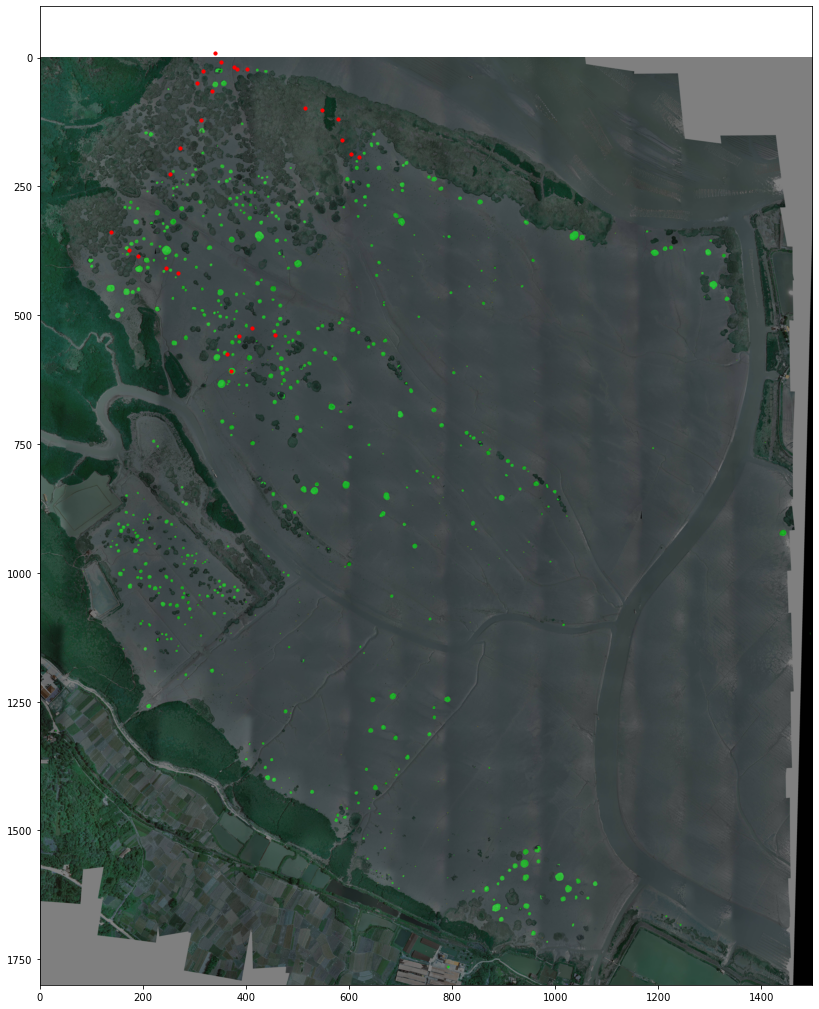

In [116]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,18))
# plt.figure(figsize=(15,18))
plt.imshow(img2_np)
for i in range(data.shape[0]):
    x = data['src_data_X'][i] / 10
    y = data['src_data_Y'][i]/10
    plt.scatter(x,y,s = 10,c = 'red')
# plt.scatter(1500,1800,s=10,c = 'red')
plt.savefig('采样点可视化.png',dpi = 480)

In [112]:
data

,采样点,纬度,经度,高程,src_data_X,src_data_Y
0,yx2011-1,23.932933,117.420159,9.510,5141.961917,986.432133
1,yx2011-2,23.932896,117.420506,9.577,5481.404150,1022.735492
2,yx2011-3,23.932721,117.420810,9.619,5778.981252,1195.114801
3,yx2011-4,23.932306,117.420896,9.743,5863.306908,1604.649570
4,yx2011-5,23.932039,117.421067,9.663,6030.919679,1868.291413
5,yx2011-6,23.931979,117.421231,9.679,6191.461134,1927.078196
6,yx2014-1,23.931635,117.417484,9.602,2524.348602,2266.494054
7,yx2014-2,23.932149,117.417674,9.741,2710.391383,1759.351197
8,yx2014-3,23.932697,117.418096,9.622,3123.480251,1218.655817
9,yx2014-4,23.933278,117.418322,9.723,3344.267911,646.435421
